 # **Applied Data Science Capstone: Battle of Neighborhoods: Buenos Aires**

## 1) Problem Description

People in argentina like good gastronimic quality. Going to restaurants and sharing a meal among friends and family, spending a whole afternoon chatting while enjoying a post-meal cofee is one the most Argentina traditions of all time. For this reason restaurant are a big deal.

With this in mind, friend of mine who is a Chef and lives in Buenos Aires, Argentina, has won a cooking competition and received some price money to set up his Restaurant. However he is not sure where he can set it up. The goal of the project is to select an optimal location for his new restaurant.

- How many venues in each neighborhood?

- How many categories in neighborhood?

- How many venues in each neighborhood?

- What are the most popular categories in each neighborhood?

- Also it is important to mention that he has a budget an unlimited budget, since the prize its called: "Restaurant of your dreams Prize" 




## 2) Data that will be used

To find the answer to this questions we will be using public available data to answer question that can lead us for best possible location for the restaurant. 

**1. List of Neighborhoods of Buenos Aires** https://en.wikipedia.org/wiki/Neighbourhoods_of_Buenos_Aires


**2. Lists of Food Venues in Buenos Aires**


**3. Socio-Economic data of Buenos Aires**


Below a data description is included

*List of Neighborhoods of Buenos Aires:* 
- A list of all neighbohoods will allow us to understand the different areas of the city where the restaurant can be set

*Food Venues*
- It is important to understan what other types of restaurants are out there so as not to create a price war against incumbent venues

*Socio-Economic Data*
- This data will allow us to learn in what areas of the city has higher income and have an idea where would it be more suitable to put the restaurant

#### Add Neighborhoods Data Set

In [13]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_91b73f69b07942a495a049d1229ea5b0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Qve_6biVu7AIH5FBcDw47ITVDSydO0BGJHrRiG_9LZ2h',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_91b73f69b07942a495a049d1229ea5b0.get_object(Bucket='applieddatasciencecapstonecourser-donotdelete-pr-9bci8jarbdempt',Key='BarriosBsAs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_BsAs = pd.read_csv(body)
df_BsAs.head(10)


,Name,Area in km2,Population,Avg Income
0,Almagro,4.1,128206,46150
1,Barracas,7.6,73377,41200
2,Belgrano,6.8,126816,87200
3,Boedo,2.6,45563,62450
4,Caballito,6.8,170309,65300
5,Flores,7.8,142695,34750
6,La Boca,3.1,43413,35000
7,La Paternal,2.2,19058,32750
8,Liniers,4.3,42083,36600
9,Mataderos,7.3,62206,35000


In [14]:

body = client_91b73f69b07942a495a049d1229ea5b0.get_object(Bucket='applieddatasciencecapstonecourser-donotdelete-pr-9bci8jarbdempt',Key='Restaurantes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Restaurants = pd.read_csv(body)
df_Restaurants.head(8)


,Restaurants,Number
0,Chinese,27
1,Italian,242
2,Vietmamese,7
3,Grill-BBQ,252
4,Home food,97
5,Mexican,12
6,Indian,3
7,Sushi,27


In [15]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [24]:
print(df_Restaurants.shape)

(10, 2)


###  Restaurants Data Set

In [35]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Restaurants.columns)

True

In [37]:
df_Restaurants.rename(columns={'Restaurants':'Cuisine'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Restaurants.head()

,Number
Cuisine,
Chinese,27
Italian,242
Vietmamese,7
Grill-BBQ,252
Home food,97


#### We can see what venues are preferred by the Buenos Aires Population

Text(0, 0.5, 'Number of Venues')

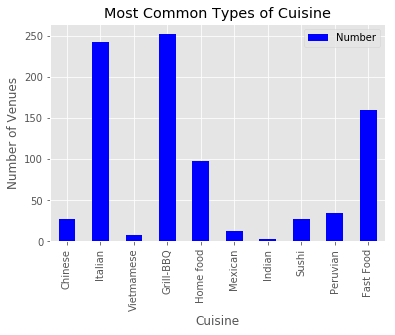

In [43]:
df_Restaurants.plot(kind='bar', color='blue')
plt.title('Most Common Types of Cuisine')
plt.ylabel('Number of Venues')

Italian food and Grilled/BBq Restaurants are most common in Buenos Aires

### Neighborhoods Data Set

In [45]:
df_BsAs.head(5)

,Name,Area in km2,Population,Avg Income
0,Almagro,4.1,128206,46150
1,Barracas,7.6,73377,41200
2,Belgrano,6.8,126816,87200
3,Boedo,2.6,45563,62450
4,Caballito,6.8,170309,65300


In [46]:
print(df_BsAs.shape)

(16, 4)


In [47]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_BsAs.columns)

True

In [54]:
# df_BsAs.set_index('Name', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_BsAs.head()

,Area in km2,Population,Avg Income
Name,,,
Almagro,4.1,128206,46150
Barracas,7.6,73377,41200
Belgrano,6.8,126816,87200
Boedo,2.6,45563,62450
Caballito,6.8,170309,65300


In [56]:
df_AvgIncome=df_BsAs['Avg Income']

Text(0.5, 0, 'Neighborhood Name')

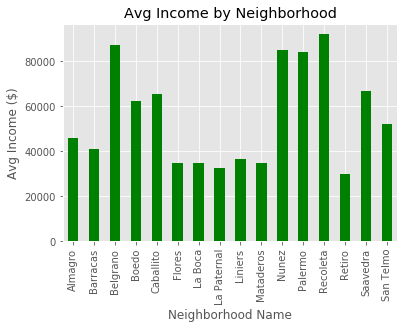

In [68]:
df_AvgIncome.plot(kind='bar', color='Green')
plt.title('Avg Income by Neighborhood')
plt.ylabel('Avg Income ($)')
plt.xlabel('Neighborhood Name')

In [58]:
df_Population=df_BsAs['Population']

Text(0.5, 0, 'Neighborhood Name')

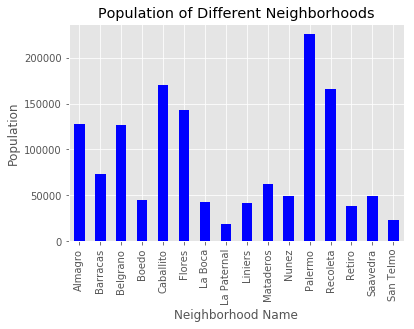

In [67]:
df_Population.plot(kind='bar',color="blue")
plt.title('Population of Different Neighborhoods')
plt.ylabel('Population')
plt.xlabel('Neighborhood Name')

Text(0, 0.5, 'Avg Income')

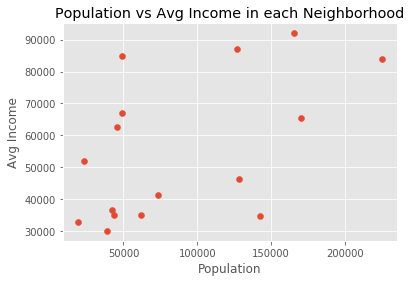

In [78]:
plt.scatter(df_Population,df_AvgIncome)
plt.title('Population vs Avg Income in each Neighborhood')
plt.xlabel('Population')
plt.ylabel('Avg Income')

### Interpretation of Graphs

From the generated graphs we can see that Belgrano, Palermo and Recoleta are High-Income and Highly-Populated areas. From this insight we can infer that these neighborhoods would be candidates to set up a restaurant there.

Morover, Football/Soccer is a very popular sport and people go to the stadiums every weekend to see their Team. Our friend would like his restaurant to be located close the the Biggest football stadium, this being River Plate's Stadium with a capacity of over 70k spectators. Around this area there is an enormous amount of foot traffic and potential customers during the weekend. This happens to be the Belgrano Neighborhood, with 127K people and $87,200 of avg yearly income

## Using Four Square Data to learn about venues in Belgrano Neighborhood

First, we begint by setting up and importing libraries to work with four square app

In [80]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [81]:
CLIENT_ID = 'QX3QPLAJFTR1LQH3BGWSNPBPXZFPW4XDBUBDK3WB4XCLOSFX' # your Foursquare ID
CLIENT_SECRET = 'FS0EPZR4HTWS2QQVIAJSQI2MVPJQGSHALV0NCFYBJVFW5YRK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 60
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QX3QPLAJFTR1LQH3BGWSNPBPXZFPW4XDBUBDK3WB4XCLOSFX
CLIENT_SECRET:FS0EPZR4HTWS2QQVIAJSQI2MVPJQGSHALV0NCFYBJVFW5YRK


### Looking around  Estadio River Plate
From the data sets analyzed we learned that Grilled/BBQ venues are among the most popular in Buenos Aires. For this reason, we will ask the FourSquare API to show us all venues classified as Parrillas, which means "Grills" in spanish

In [82]:
latitude = -34.5453
longitude = -58.4498

In [83]:
# Search for a Venue Category
search_query = ('Parrilla')
radius = 2000
print(search_query + ' .... OK!')

Parrilla .... OK!


In [84]:
# Define Corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=QX3QPLAJFTR1LQH3BGWSNPBPXZFPW4XDBUBDK3WB4XCLOSFX&client_secret=FS0EPZR4HTWS2QQVIAJSQI2MVPJQGSHALV0NCFYBJVFW5YRK&ll=-34.5453,-58.4498&v=20180604&query=Parrilla&radius=2000&limit=60'

In [85]:
# Set Request and Examin Results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea721d0da9e14001b9fe381'},
 'response': {'venues': [{'id': '4dfabb87b61c6408772d39db',
    'name': 'Parrilla El Cocacolero',
    'location': {'address': 'Av. Costanera Norte Rafael Obligado s/n',
     'lat': -34.54695412483968,
     'lng': -58.430826246786566,
     'labeledLatLngs': [{'label': 'display',
       'lat': -34.54695412483968,
       'lng': -58.430826246786566}],
     'distance': 1749,
     'postalCode': 'C1428DYC',
     'cc': 'AR',
     'city': 'Buenos Aires',
     'state': 'Buenos Aires C.F.',
     'country': 'Argentina',
     'formattedAddress': ['Av. Costanera Norte Rafael Obligado s/n',
      'C1428DYC Buenos Aires',
      'Buenos Aires C.F.',
      'Argentina']},
    'categories': [{'id': '4bf58dd8d48988d1cb941735',
      'name': 'Food Truck',
      'pluralName': 'Food Trucks',
      'shortName': 'Food Truck',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
       'suffix': '.png'},
      'primar

In [86]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",False,4dfabb87b61c6408772d39db,Av. Costanera Norte Rafael Obligado s/n,AR,Buenos Aires,Argentina,NaN,1749,"[Av. Costanera Norte Rafael Obligado s/n, C142...","[{'label': 'display', 'lat': -34.5469541248396...",-34.546954,-58.430826,NaN,C1428DYC,Buenos Aires C.F.,Parrilla El Cocacolero,v-1588011498,NaN
1,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",False,4c62e1147c9def3b2258d71c,Mariscal Antonio José de Sucre 1299,AR,Buenos Aires,Argentina,esq. Miñones,1443,[Mariscal Antonio José de Sucre 1299 (esq. Miñ...,"[{'label': 'display', 'lat': -34.5573286389577...",-34.557329,-58.443922,NaN,C1428DUM,Buenos Aires C.F.,La Esquina - Parrilla,v-1588011498,NaN
2,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",False,4c3a0a23dfb0e21e2772b1a8,Arribenos 3600,AR,Capital Federal,Argentina,Crisologo Larralde,977,"[Arribenos 3600 (Crisologo Larralde), Capital ...","[{'label': 'display', 'lat': -34.5450293377858...",-34.545029,-58.460460,NaN,NaN,Buenos Aires,Parrilla Juan y Juan,v-1588011498,NaN
3,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",False,4ed18b56722e01c583c85a5c,NaN,AR,NaN,Argentina,NaN,924,[Argentina],"[{'label': 'display', 'lat': -34.5526205031002...",-34.552621,-58.454556,NaN,NaN,NaN,Parrilla Besares,v-1588011498,NaN
4,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",False,4ba02227f964a520975c37e3,Av. Dr. Ricardo Balbín 2782,AR,Buenos Aires,Argentina,esq. Manuel Ugarte,2522,[Av. Dr. Ricardo Balbín 2782 (esq. Manuel Ugar...,"[{'label': 'display', 'lat': -34.5607443356963...",-34.560744,-58.469930,NaN,C1428CVR,Buenos Aires C.F.,Gran Parrilla Crámer,v-1588011498,NaN


In [87]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Parrilla El Cocacolero,Food Truck,Av. Costanera Norte Rafael Obligado s/n,AR,Buenos Aires,Argentina,NaN,1749,"[Av. Costanera Norte Rafael Obligado s/n, C142...","[{'label': 'display', 'lat': -34.5469541248396...",-34.546954,-58.430826,NaN,C1428DYC,Buenos Aires C.F.,4dfabb87b61c6408772d39db
1,La Esquina - Parrilla,BBQ Joint,Mariscal Antonio José de Sucre 1299,AR,Buenos Aires,Argentina,esq. Miñones,1443,[Mariscal Antonio José de Sucre 1299 (esq. Miñ...,"[{'label': 'display', 'lat': -34.5573286389577...",-34.557329,-58.443922,NaN,C1428DUM,Buenos Aires C.F.,4c62e1147c9def3b2258d71c
2,Parrilla Juan y Juan,BBQ Joint,Arribenos 3600,AR,Capital Federal,Argentina,Crisologo Larralde,977,"[Arribenos 3600 (Crisologo Larralde), Capital ...","[{'label': 'display', 'lat': -34.5450293377858...",-34.545029,-58.460460,NaN,NaN,Buenos Aires,4c3a0a23dfb0e21e2772b1a8
3,Parrilla Besares,BBQ Joint,NaN,AR,NaN,Argentina,NaN,924,[Argentina],"[{'label': 'display', 'lat': -34.5526205031002...",-34.552621,-58.454556,NaN,NaN,NaN,4ed18b56722e01c583c85a5c
4,Gran Parrilla Crámer,BBQ Joint,Av. Dr. Ricardo Balbín 2782,AR,Buenos Aires,Argentina,esq. Manuel Ugarte,2522,[Av. Dr. Ricardo Balbín 2782 (esq. Manuel Ugar...,"[{'label': 'display', 'lat': -34.5607443356963...",-34.560744,-58.469930,NaN,C1428CVR,Buenos Aires C.F.,4ba02227f964a520975c37e3
5,Besares Parrilla Urbana,Argentinian Restaurant,11 de Septiembre 3301,AR,Buenos Aires,Argentina,esq. Besares,948,"[11 de Septiembre 3301 (esq. Besares), 1429 Bu...","[{'label': 'display', 'lat': -34.547819, 'lng'...",-34.547819,-58.459678,"Núñez, Buenos Aires, Buenos Aires F.D.",1429,Buenos Aires C.F.,4d3785966eef5481148e3848
6,Parrilla Lumay,None,Grecia,AR,Buenos Aires,Argentina,Manuela Pedraza,1198,"[Grecia (Manuela Pedraza), 1429 Buenos Aires, ...","[{'label': 'display', 'lat': -34.5464204, 'lng...",-34.546420,-58.462799,NaN,1429,Cap. Fed.,4d61b0f5ef378cfa5c318ea6
7,Parrilla Villera Inn,BBQ Joint,Ohiggins 2845,AR,Buenos Aires,Argentina,Av Congreso,1226,"[Ohiggins 2845 (Av Congreso), Buenos Aires, Bu...","[{'label': 'display', 'lat': -34.5533057957818...",-34.553306,-58.458983,NaN,NaN,Buenos Aires C.F.,54a6a997498ec4ba52ab0160
8,Parrilla de la Barrera,BBQ Joint,Arribeños 2108,AR,Buenos Aires,Argentina,esq. Juramento,1408,"[Arribeños 2108 (esq. Juramento), C1428APB Bue...","[{'label': 'display', 'lat': -34.557947, 'lng'...",-34.557947,-58.450354,NaN,C1428APB,Buenos Aires C.F.,5151c6afe4b06114b19467b4
9,Parrilla Al Carbon,Argentinian Restaurant,NaN,AR,NaN,Argentina,NaN,1475,[Argentina],"[{'label': 'display', 'lat': -34.5585561468298...",-34.558556,-58.449806,NaN,NaN,NaN,4c464668f1b5c9b62a1d79ef


In [88]:
dataframe_filtered.name

0           Parrilla El Cocacolero
1            La Esquina - Parrilla
2             Parrilla Juan y Juan
3                 Parrilla Besares
4             Gran Parrilla Crámer
5          Besares Parrilla Urbana
6                   Parrilla Lumay
7             Parrilla Villera Inn
8           Parrilla de la Barrera
9               Parrilla Al Carbon
10       Mi Pinche Pincha Parrilla
11                Parrilla al Paso
12                 Parrilla Butler
13                 Parrilla Stoppy
14         Besares Parrilla Urbana
15             Parrilla Un Clasico
16          Carmín Parrilla Urbana
17             La Parrilla De Tito
18              Emperador parrilla
19    Placeres Criollos - Parrilla
20                          Carmín
21                   Los Arribeños
22             La parrilla de Fede
23                          Checho
24         El Paisano Kosher House
Name: name, dtype: object

In [90]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Conrad Hotel

# Add a red circle marker to represent the River Plate Stadium
folium.features.CircleMarker(
    [latitude, longitude],
    radius=20,
    color='red',
    popup='River Plate Stadium',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Parrilla: Grills/BBQs restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=10,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

With this information we can look at the map see what areas close to the Stadium, do not have any restaurant of type Grill, the most preffered by the people in Buenos Aires.

### New Location

By looking at the map we can see that the closet area that does not have exxisting property is the intersection of the main avenues Libertador and Monroe

In [92]:
latitudeNew= (-34.552914)
longitudeNew= (-58.450822)

folium.features.CircleMarker(
    [latitudeNew, longitudeNew],
    radius=20,
    color='Yellow',
    popup='New Restaurant',
    fill = True,
    fill_color = 'Yellow',
    fill_opacity = 0.6
).add_to(venues_map)


In [93]:
# display map
venues_map

Now, we can see in the map where the new restaurant shoud be located